In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.cluster import KMeans

## Carga de datos train

In [2]:
df = pd.read_csv("../data/train/train.csv")
df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,4.862270,2.471408,0,0,9.788456,0
1,28.316033,5.021810,0,0,2.873132,0
2,27.204428,3.819500,1,0,2.150132,0
3,6.177355,0.036686,0,0,2.570051,1
4,6.847389,9.246352,1,0,1.814942,1


In [3]:
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

## Carga de datos test

In [4]:
df_test = pd.read_csv("../data/test/test.csv")

In [5]:
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

## Entrenamiento de modelos

### Prueba con modelo no supervisado de Kmeans para el preprocesamiento

In [6]:
kmeans = KMeans(n_clusters=6, random_state=11)
kmeans.fit(X_train)
X_train_km = kmeans.transform(X_train)
X_test_km = kmeans.transform(X_test)

Guardado de modelo con pickle

In [8]:
pickle.dump(kmeans, open("../models/07_modelo_kmeans.pkl", "wb"))

Prueba con Random Forest después del preprocesamiento con Kmeans

In [9]:
rf_km = RandomForestClassifier(n_estimators=700, class_weight="balanced", random_state=11)
rf_km.fit(X_train_km, y_train)

pred_rfkm = rf_km.predict(X_test_km)
pred_rfkm2 = rf_km.predict_proba(X_test_km)[:,1]
print("Recall:", recall_score(y_test, pred_rfkm))
print("Accuracy:", accuracy_score(y_test, pred_rfkm))
print("AUC:", roc_auc_score(y_test, pred_rfkm2))
print("CM:", confusion_matrix(y_test, pred_rfkm))

Recall: 0.6428571428571429
Accuracy: 0.7953488372093023
AUC: 0.8651891586674195
CM: [[243  33]
 [ 55  99]]


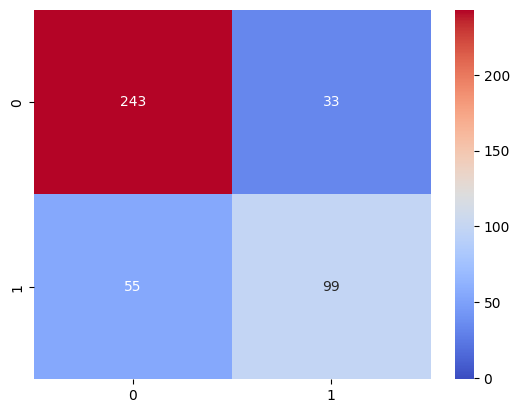

In [10]:
sns.heatmap(confusion_matrix(y_test, pred_rfkm), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Prueba con Logistic Regression después del preprocesamiento con Kmeans

In [11]:
lr_km = LogisticRegression(max_iter=5000, class_weight="balanced")
lr_km.fit(X_train_km, y_train)

pred_km = lr_km.predict(X_test_km)
pred_km2 = lr_km.predict_proba(X_test_km)[:,1]
print("Recall:", recall_score(y_test, pred_km))
print("Accuracy:", accuracy_score(y_test, pred_km))
print("AUC:", roc_auc_score(y_test, pred_km2))
print("CM:", confusion_matrix(y_test, pred_km))

Recall: 0.7597402597402597
Accuracy: 0.7767441860465116
AUC: 0.8530491247882552
CM: [[217  59]
 [ 37 117]]


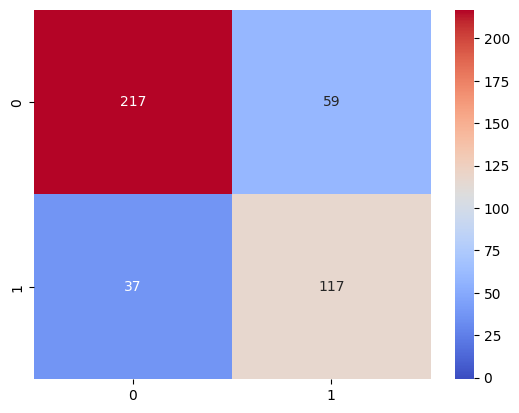

In [12]:
sns.heatmap(confusion_matrix(y_test, pred_km), annot=True, vmin=-1, fmt="d", cmap="coolwarm");